D:/Dataset/dana36/views\01\annotations
000010.txt
000011.txt
000012.txt
000013.txt
000014.txt
000015.txt
000016.txt
000017.txt
000018.txt
000019.txt
000020.txt
000021.txt
000022.txt
000023.txt
000024.txt
000025.txt
000026.txt
000027.txt
000028.txt
000029.txt
000030.txt
000031.txt
000032.txt
000033.txt
000034.txt
000035.txt
000036.txt
000037.txt
000038.txt
000039.txt
000040.txt
000041.txt
000042.txt
000043.txt
000048.txt
000083.txt
000084.txt
000085.txt
000086.txt
000087.txt
000088.txt
000089.txt
000090.txt
000091.txt
000092.txt
000093.txt
000094.txt
000095.txt
000096.txt
000097.txt
000098.txt
000099.txt
000100.txt
000101.txt
000102.txt
000103.txt
000104.txt
000105.txt
000106.txt
000107.txt
000108.txt
000109.txt
000110.txt
000111.txt
000112.txt
000113.txt
000114.txt
000115.txt
000116.txt
000117.txt
000118.txt
000119.txt
000120.txt
000121.txt
000122.txt
000123.txt
000124.txt
000125.txt
000126.txt
000127.txt
000128.txt
000129.txt
000130.txt
000131.txt
000132.txt
000133.txt
000134.txt
0001

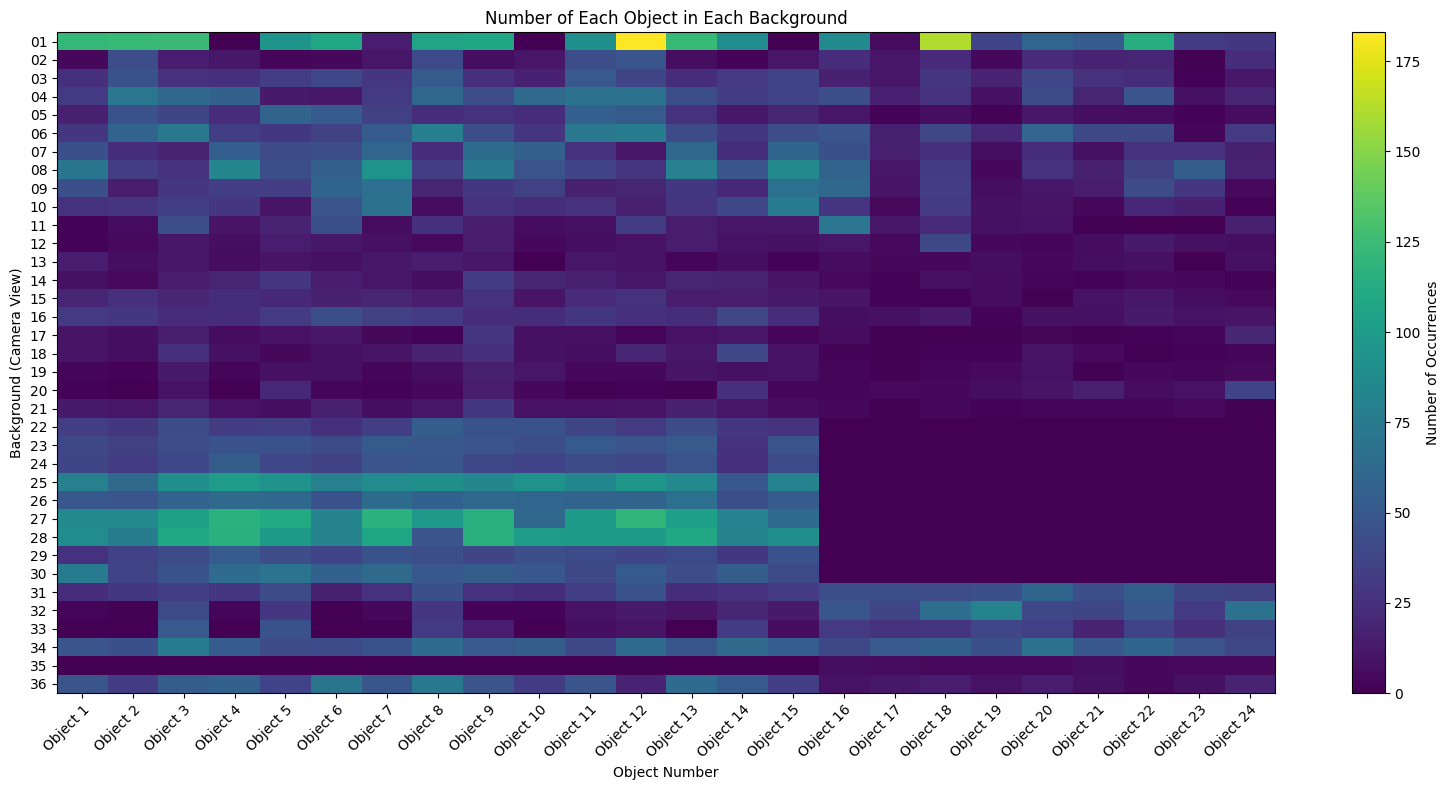

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Path to the root 'views' directory containing the 36 directories
root_dir = 'D:/Dataset/dana36/views'

# Initialize a dictionary to store object counts for each background
# Each entry will be a list of 24 zeros (one for each object)
object_counts_per_background = {str(i).zfill(2): [0] * 24 for i in range(1, 37)}

# Loop through each directory (01 to 36)
for view_dir in object_counts_per_background.keys():
    annotations_dir = os.path.join(root_dir, view_dir, 'annotations')
    print(annotations_dir)
    # Loop through each .txt file in the 'annotations' directory
    for annotation_file in os.listdir(annotations_dir):
        print(annotation_file)
        if annotation_file.endswith('.txt'):
            # Read the content of the .txt file
            with open(os.path.join(annotations_dir, annotation_file), 'r') as file:
                lines = file.readlines()

            # Check each line to see if it represents a non-zero bounding box
            for i, line in enumerate(lines):
                values = list(map(int, line.strip().split(',')))
                if values != [0, 0, 0, 0]:  # If bounding box is non-zero
                    object_counts_per_background[view_dir][i] += 1

# Convert the dictionary to a NumPy array for easier plotting
object_counts_array = np.array(list(object_counts_per_background.values()))

# Plot the distribution for each object across all backgrounds
fig, ax = plt.subplots(figsize=(16, 8))
im = ax.imshow(object_counts_array, cmap='viridis', aspect='auto')

# Set the labels for the axes
ax.set_xticks(np.arange(24))
ax.set_yticks(np.arange(36))
ax.set_xticklabels([f'Object {i + 1}' for i in range(24)])
ax.set_yticklabels([str(i).zfill(2) for i in range(1, 37)])
plt.xlabel('Object Number')
plt.ylabel('Background (Camera View)')

# Rotate the tick labels and set the title
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
plt.title('Number of Each Object in Each Background')

# Add a color bar to indicate the number of occurrences
cbar = ax.figure.colorbar(im, ax=ax, orientation='vertical')
cbar.set_label('Number of Occurrences')

plt.tight_layout()
plt.show()